In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
PyTorch version 2.0.1+cu118
Torchvision version 0.15.2+cu118
Numpy version 1.23.5
Pandas version 1.5.3


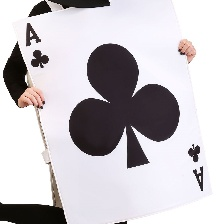

In [19]:
#Lets view an image
from IPython.display import Image
Image('drive/MyDrive/playing_card_data/train/ace of clubs/001.jpg')

# Step 1. Pytorch Dataset (and Dataloader)


In [20]:
#Define class
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    #methods
    def __len__(self):
        return len(self.data)  #Returns length of data

    def __getitem__(self, idx):
        return self.data[idx] #Return item based on index

    @property
    def classes(self):
        return self.data.classes  #Return name of folder

In [21]:
dataset = PlayingCardDataset(
    data_dir='/content/drive/MyDrive/playing_card_data/train'
)

In [22]:
len(dataset) #Output the number of playing cards in the dataset

7624

In [23]:
dataset[0] #get the first index of the playing card from the dataset

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

0


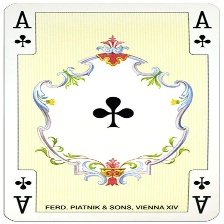

In [24]:
image, label = dataset[40]
print(label)
image

In [ ]:
card_types = dataset.classes #get the list of classes from the dataset
card_types

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

In [ ]:
# Get a dictionary associating target values with folder names
data_dir = '/content/drive/MyDrive/playing_card_data/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [ ]:
#Using transforms function to resize images
transform = transforms.Compose([
    transforms.Resize((128, 128)), #image size
    transforms.ToTensor(), #convert into pytorch tensors
])

data_dir = '/content/drive/MyDrive/playing_card_data/train'
dataset = PlayingCardDataset(data_dir, transform)

In [ ]:
image, label = dataset[0]
image.shape

torch.Size([3, 128, 128])

In [ ]:
  # iterate over dataset for verification
for images, labels in dataset:
    break

In [ ]:
images, labels

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
          [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
          [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

# Dataloaders: Batching our dataset

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True) #32 images at a time, shuffle image at random (typically we only use shuffle during training)



In [ ]:
#verify batched dataset
for images, labels in dataloader:
    break

images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [ ]:
labels

tensor([51, 40, 19, 46, 20, 28, 20, 36, 23, 29, 12, 35, 30, 50,  2, 11, 17,  4,
        29, 12, 52, 39, 40, 14, 35, 31, 38, 30, 27, 15, 32, 19])

# Step 2: Creating the Pytorch Model

Pytorch datasets have a structured way of organizing your data, pytorch models follow a similar paradigm.

We could create the model from scratch defining each layer.
However for tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm.
Understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [6]:
class SimpleCardClassifier(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifier, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [ ]:
#verify model
model = SimpleCardClassifier(num_classes=53)
print(str(model)[:500])

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [43]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 53])

# Pytorch Training

*   Now that we understand the general paradigm of pytorch datasets and models, we need to create the process of training this model.
*   Some things to consider: We want to validate our model on data it has not been trained on, so usually we split our data into a train and validate datasets (I have whole videos on this). This is easy because we can just create two datasets using our existing class.
*  Terms:
 * Epoch: One run through the entire training dataset.
 * Step: One batch of data as defined in our dataloader

* This loop is one you will become familiar with when training models, you load in data to the model in batches - then calculate the loss and perform backpropagation. There are packages that package this for you, but it's good to have at least written it once to understand how it works.

Two things to select:
* optimizer, adam is the best place to start for most tasks.
* loss function: What the model will optimize for.

In [41]:
# Loss function
criterion = nn.CrossEntropyLoss() #for multi-class classification
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [44]:
#Test out loss function
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


## Setup datasets


In [39]:
#Setup our transform (resize image and convert into tensors)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
#data path/directory
train_folder = 'drive/MyDrive/playing_card_data/train'
valid_folder = 'drive/MyDrive/playing_card_data/valid'
test_folder = 'drive/MyDrive/playing_card_data/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

#Turn into batches of 32, shuffle only for training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Create simple training loop

In [ ]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'): #progress bar
        # Move inputs and labels to the gpu device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() #reset gradient
        outputs = model(images) #forward pass/function
        loss = criterion(outputs, labels) #compute loss
        loss.backward() #computes the gradients.
        optimizer.step() #dates the model's parameters based on these gradients to improve its performance.
        running_loss += loss.item() * labels.size(0) #track the running loss during training
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad(): #disable gradient computation during validation phase
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.5692566259210032, Validation loss: 0.5551670578290832


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5453470896261061, Validation loss: 0.23733463742822972


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.3223106083689807, Validation loss: 0.16097080381411427


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.248071847419017, Validation loss: 0.18335579883939815


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.19758960035515233, Validation loss: 0.1047764299050817


# Visualize losses

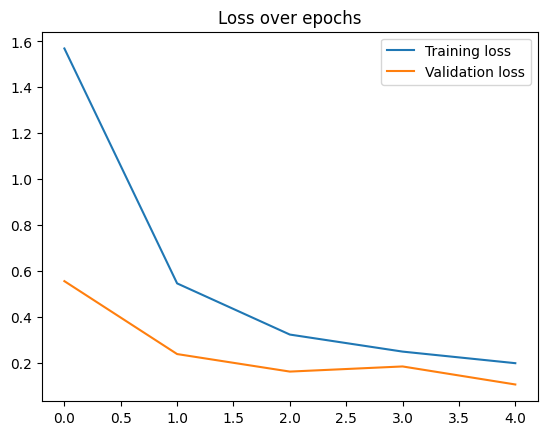

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

# Evaluating results


In [12]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example

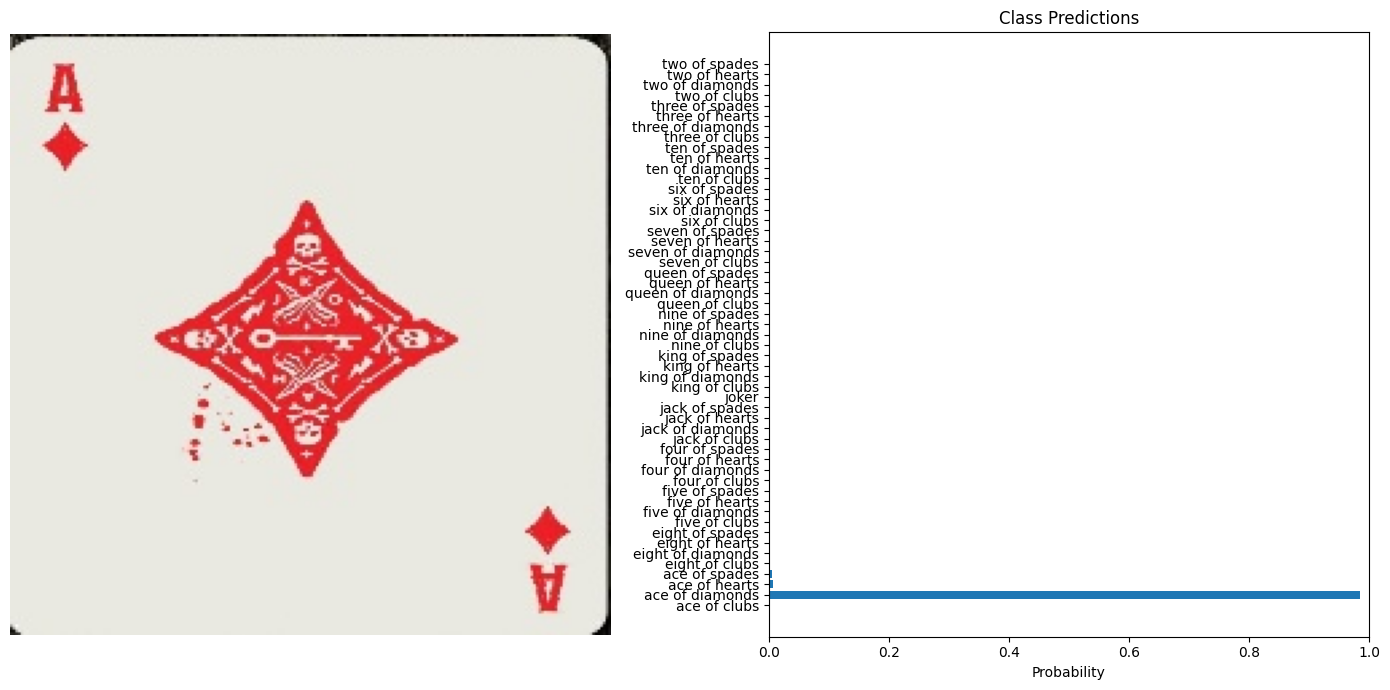

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #check for gpu(cuda)
# Example usage
test_image = "drive/MyDrive/playing_card_data/test/ace of diamonds/3.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)

In [37]:
from glob import glob
test_images = glob('drive/MyDrive/playing_card_data/test/*/*') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_predictions(original_image, probabilities, class_names)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
# Save the model's state dictionary after training in a specific directory
directory_path = 'drive/MyDrive/playing_card_data/models'
file_name = 'trained_model.pth'
torch.save(model.state_dict(), os.path.join(directory_path, file_name))


In [18]:
# Create an instance of the model class
model = SimpleCardClassifier(num_classes=53)

# Load the saved model's state dictionary onto the CPU
model.load_state_dict(torch.load('drive/MyDrive/playing_card_data/models/trained_model.pth', map_location=torch.device('cpu')))

# Move the model to the CPU for inference
model.to(torch.device('cpu'))



SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ke

# Test accuracy

In [45]:
# Test phase
model.eval()
running_loss = 0.0
correct_predictions = 0
total_data_points = 0

with torch.no_grad():  # Disable gradient computation during testing
    for images, labels in tqdm(test_loader, desc='Testing loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * labels.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1) # _ used as a placeholder since we dont want to display the max values
        correct_predictions += (predicted == labels).sum().item()
        total_data_points += labels.size(0)

test_loss = running_loss / len(test_loader.dataset)
test_accuracy = (correct_predictions / total_data_points) * 100

print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy:.2f}%")


Testing loop:   0%|          | 0/9 [00:00<?, ?it/s]

Test loss: 0.10477640831245566, Test accuracy: 97.36%


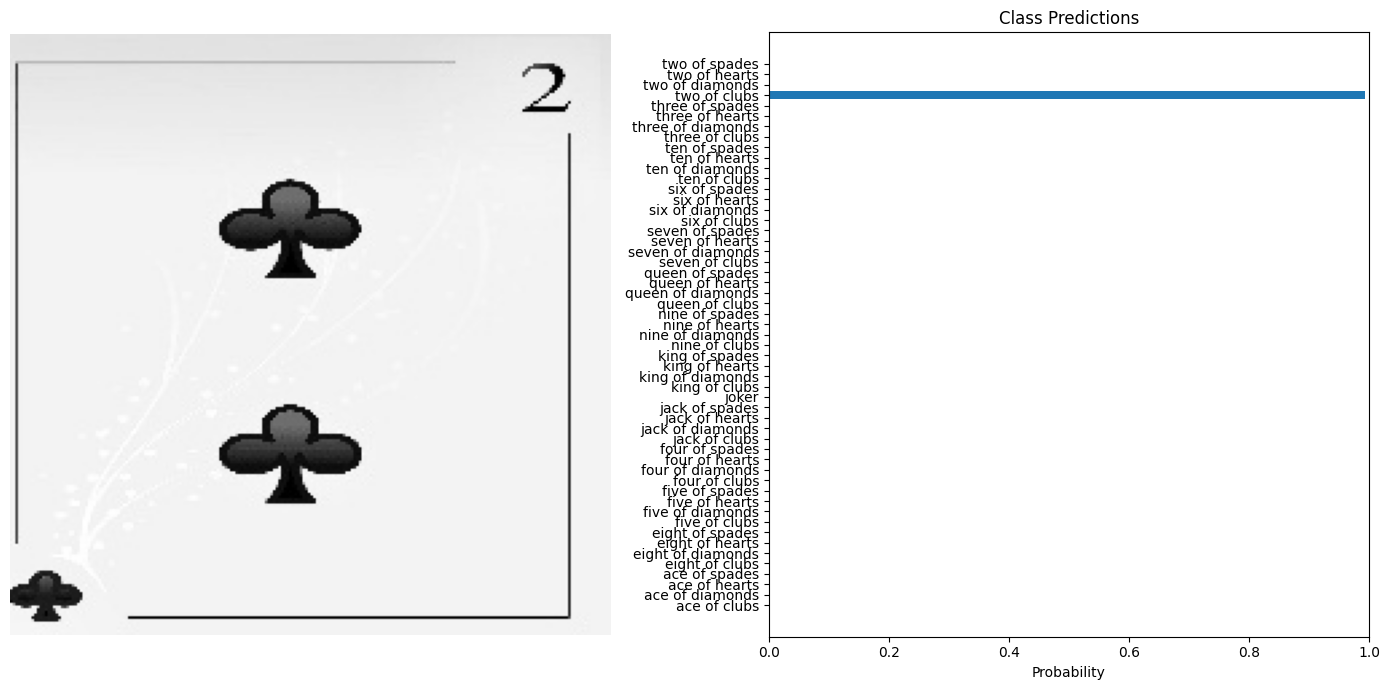

In [50]:
from glob import glob
test_images = glob('drive/MyDrive/playing_card_data/test/*/*') # * is used as a wildcard to match any sequence (ace of diamonds/3.jpg)
test_examples = np.random.choice(test_images, 1)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_predictions(original_image, probabilities, class_names)